In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
casos = pd.read_pickle('casos_actualitzat.pkl')

In [7]:
with open('clustering/model_clustering_casos_actualitzat.pkl', 'rb') as arxiu:
    kmeans = pickle.load(arxiu)


In [5]:
X = np.vstack(np.array(casos.vector))


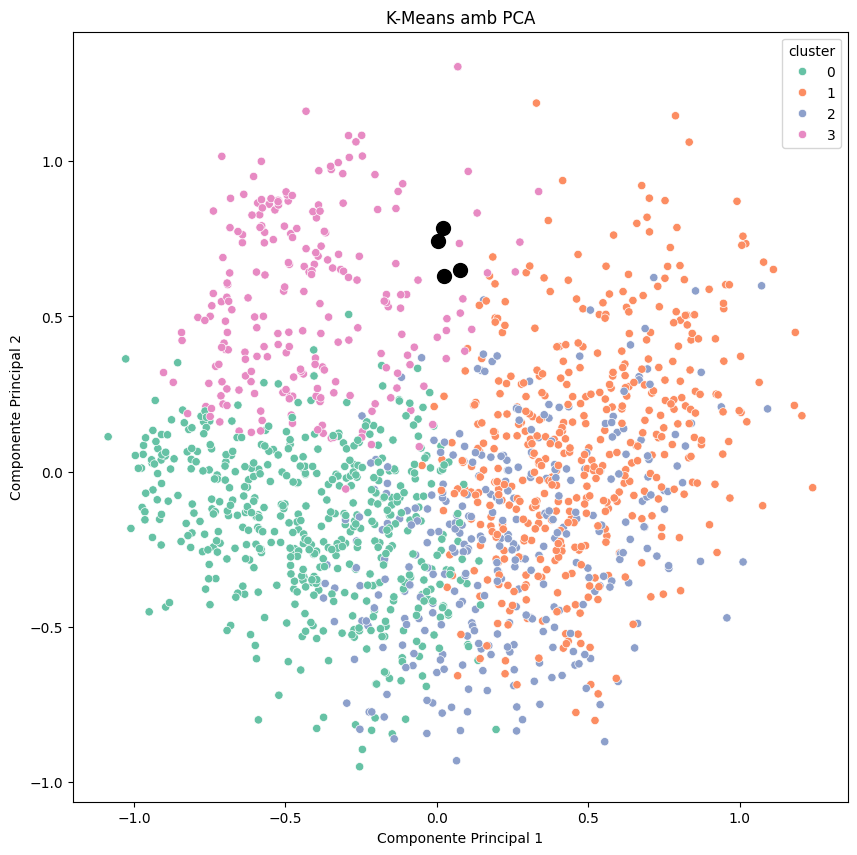

In [11]:
# Plot PCA 2d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

# Plot PCA 2d and centroids
labels = casos.cluster
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-Means amb PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('../plots/kmeans_pca_casos_actualitzat.png')

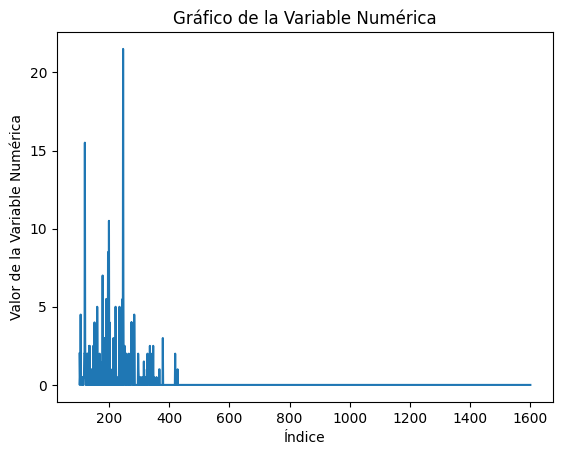

In [13]:
import matplotlib.pyplot as plt


# Graficar la variable numérica
plt.plot(casos['utilitat'])

# Agregar etiquetas y título al gráfico
plt.xlabel('Índice')
plt.ylabel('Valor de la Variable Numérica')
plt.title('Gráfico de la Variable Numérica')

# Mostrar el gráfico
plt.show()


In [23]:
df = pd.read_pickle('llibres.pkl')

In [34]:
df.columns

Index(['isbn', 'book_id', 'similar_books', 'average_rating', 'ratings_count',
       'description', 'authors', 'isbn13', 'num_pages', 'publication_year',
       'title', 'language_code', 'format', 'series', 'genres', 'complexitat',
       'desenvolupament_del_personatge', 'epoca', 'detall_cientific',
       'bestseller', 'cluster', 'estil_literari', 'vector'],
      dtype='object')

In [ ]:
llibres_dummies = pd.get_dummies(df, columns=['language_code', 'format', 'estil_literari', 'complexitat', 'desenvolupament_del_personatge', 'epoca', 'detall_cientific'], dtype=bool)

In [26]:
unique_genres = set()
for index, row in df.iterrows():
    for genre in row['genres']:
        unique_genres.add(genre)
unique_genres = list(unique_genres)

In [43]:
llista=list(llibres_dummies.columns[16:]) + ['average_rating'] + ['num_pages'] + unique_genres

36

In [44]:
llista

['language_code_Asia',
 'language_code_Europa',
 'language_code_No identificado',
 'format_audio',
 'format_ebook',
 'format_tapa blanda',
 'format_tapa dura',
 'estil_literari_modernisme',
 'estil_literari_naturalisme',
 'estil_literari_postmodernisme',
 'estil_literari_realisme',
 'estil_literari_realisme magico',
 'estil_literari_romanticisme',
 'estil_literari_simbolisme',
 'complexitat_alta',
 'complexitat_baixa',
 'complexitat_mitjana',
 'desenvolupament_del_personatge_alt',
 'desenvolupament_del_personatge_baix',
 'desenvolupament_del_personatge_mitja',
 'epoca_actual',
 'epoca_futura',
 'epoca_passada',
 'detall_cientific_alta',
 'detall_cientific_baix',
 'detall_cientific_mitja',
 'average_rating',
 'num_pages',
 'fantasy',
 'poetry',
 'romance',
 'comics',
 'history',
 'mystery',
 'children',
 'young-adult']

In [20]:
for i in range(0,5):
    print(len(casos[casos.cluster ==i]))

501
453
320
224
0


In [15]:
casos[casos.utilitat >=20]

,user_id,llibres_usuari,val_llibres,llibres_recomanats,puntuacions_llibres,cluster,utilitat,vector
247,f8c6ea3a390200120aa41fbba90f4372,"[15717943, 15704001, 13638570, 13369678, 13454...","[5, 5, 5, 5, 5, 5, 5, 5, 4, 5]","[11709423, 9436924, 13451045]","[5, 5, 5]",3,21.5,"[0.0, 0.6825, 0.0, 0.0, 0.609, 0.0761, 0.0609,..."
